In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

numsim = 300
y_I = 1
c_I = 1
c_O = 1.5
y_O = 0.5
b = -0.1
a = 0.1

N = np.zeros(numsim)
I = np.zeros(numsim)
O = np.zeros(numsim)

D_O = np.zeros(numsim)
D_I = np.zeros(numsim)

price_O = np.zeros(numsim)
price_I = np.zeros(numsim)
cost_O = np.zeros(numsim)
cost_I = np.zeros(numsim)
production_O = np.zeros(numsim)
production_I = np.zeros(numsim)

epsilon = np.zeros(numsim)

N[:2] = 100
I[:2] = 100
O[:2] = 100
size = N[0] + I[0] + O[0]

epsilon[:2] = 1

production_I[0] = y_I * I[0]
production_O[0] = y_O * epsilon[0]**a * O[0]

cost_I[0] = c_I * epsilon[0]**b * I[0]
cost_O[0] = c_O * O[0]

price_I[0] = cost_I[0] / production_I[0]
price_O[0] = cost_O[0] / production_O[0]

D_O[:2] = production_O[0]
D_I[:2] = production_I[0]

alpha = 0.01
beta = 0.0
gamma = 0.0

delta = 1
kappa = 1

sigma = 0.1

for i in np.arange(1, numsim-1):

    production_I[i] = y_I * I[i]
    production_O[i] = y_O * epsilon[i]**a * O[i]

    cost_I[i] = c_I * epsilon[i]**b * I[i]
    cost_O[i] = c_O * O[i]

    price_I[i] = cost_I[i] / production_I[i]
    price_O[i] = cost_O[i] / production_O[i]
    
    d_epsilon_dt = epsilon[i] * (- alpha * I[i]/size + beta * O[i]/size + gamma * N[i]/size)
    epsilon[i+1] = epsilon[i] + d_epsilon_dt

    dO_dt = delta * (D_O[i] - production_O[i])/y_O
    dI_dt = gamma * (D_I[i] - production_I[i])/y_I
    dN_dt = - dI_dt - dO_dt

    O[i+1] = O[i] + dO_dt
    I[i+1] = I[i] + dI_dt
    N[i+1] = N[i] + dN_dt

    d_D_O_dt = D_O[i] * sigma * (price_O[i]/price_I[i] - price_O[i-1]/price_I[i-1])

    D_O[i+1] = D_O[i] + d_D_O_dt
    D_I[i+1] = D_I[i] - d_D_O_dt




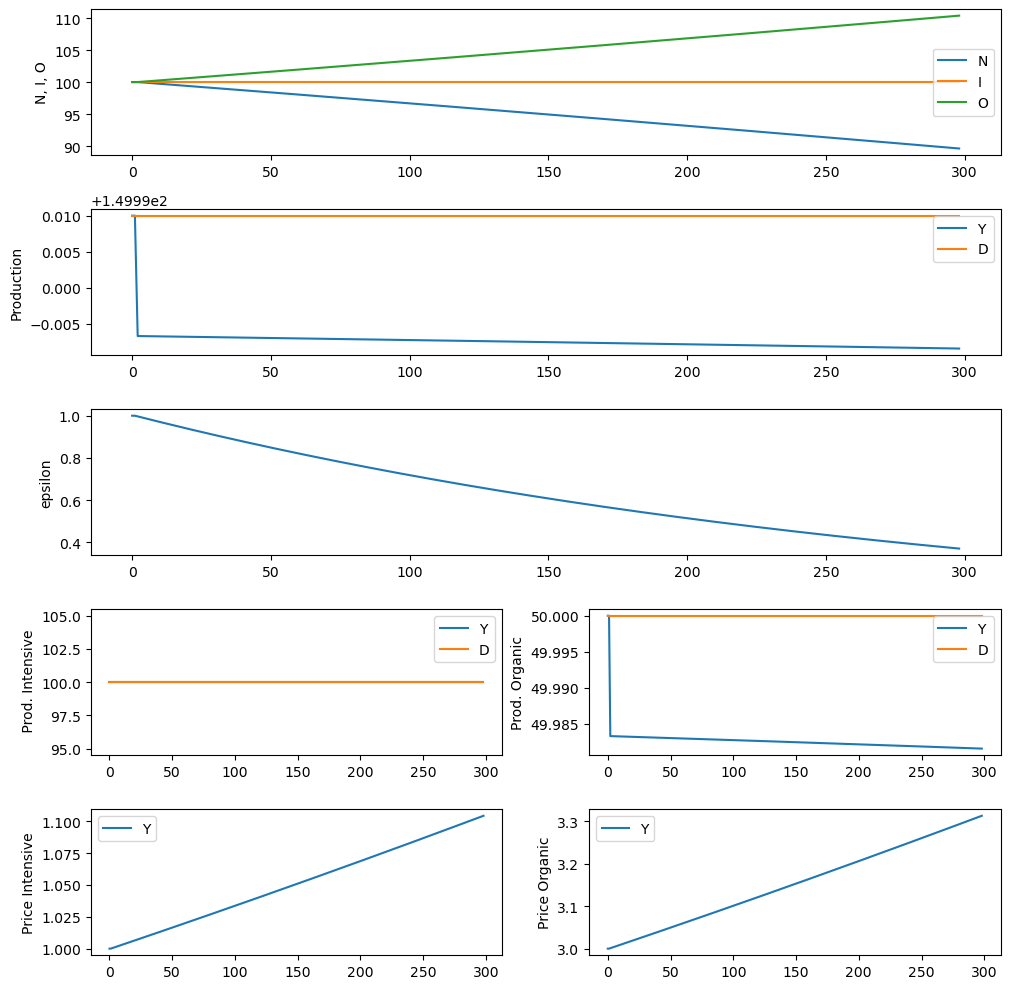

In [162]:
# Plotting
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=5, ncols=2)


# Plot N, I, O together
ax = fig.add_subplot(gs[0, :])
ax.plot(N[:-1], label='N')
ax.plot(I[:-1], label='I')
ax.plot(O[:-1], label='O')
ax.set_ylabel('N, I, O')
ax.legend()

# Plot total production and demand 
ax = fig.add_subplot(gs[1, :])
ax.plot(production_I[:-1] + production_O[:-1], label='Y')
ax.plot(D_O[:-1] + D_I[:-1], label='D')
ax.set_ylabel('Production')
ax.legend()

# Plot epsilon
ax = fig.add_subplot(gs[2, :])
ax.plot(epsilon[:-1], label='N')
ax.set_ylabel('epsilon')

# Plot production_I and D_I
ax = fig.add_subplot(gs[3, 0])
ax.plot(production_I[:-1], label='Y')
ax.plot(D_I[:-1], label='D')
ax.set_ylabel(' Prod. Intensive')
ax.legend()

# Plot production_0 and D_0
ax = fig.add_subplot(gs[3, 1])
ax.plot(production_O[:-1], label='Y')
ax.plot(D_O[:-1], label='D')
ax.set_ylabel('Prod. Organic')
ax.legend()

# Plot production_I and D_I
ax = fig.add_subplot(gs[4, 0])
ax.plot(price_I[:-1], label='Y')
ax.set_ylabel('Price Intensive')
ax.legend()

# Plot production_0 and D_0
ax = fig.add_subplot(gs[4, 1])
ax.plot(price_O[:-1], label='Y')
ax.set_ylabel('Price Organic')
ax.legend()

plt.tight_layout()
plt.show()

